First I will check SIMC datasets. 
This EDA will follow steps in https://r4ds.hadley.nz/eda
First question is "What type of variation occurs within my variables?"
Before I answer this question, I'll look through datasets.
First thing to do is check whether all csv have same features. 

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
csv_folder = r"C:\Users\sprin\Downloads\SIMC_OverlapTiffsWithPP\SIMC_OverlapTiffsWithPP\SIMC.Overlap.csv"

csv_files = [f for f in os.listdir(csv_folder) if f.endswith(".csv")]

first_csv = pd.read_csv(os.path.join(csv_folder, csv_files[0]))
reference_columns = set(first_csv.columns)

# Check all other CSVs
inconsistent_files = []
for csv_file in csv_files[1:]:
    df = pd.read_csv(os.path.join(csv_folder, csv_file))
    if set(df.columns) != reference_columns:
        inconsistent_files.append(csv_file)

if inconsistent_files:
    print("The following files have inconsistent columns:", inconsistent_files)
else:
    print("All CSV files have the same columns.")

The following files have inconsistent columns: ['20190503_SIMC_009_2mm_rep2_KG_data.csv', '20190506_SIMC_017_2mm_rep3_KG_data.csv', '20190508_SIMC_045_2mm_rep3_KG_data.csv', '20190508_SIMC_047_2mm_rep1_KG_data.csv', '20190514_SIMC_051_2mm_rep3_KG_data.csv', '20190514_SIMC_055_2mm_rep1_KG_data.csv', '20190515_SIMC_069_2mm_rep3_KG_data.csv', '20190523_SIMC_107_2mm_rep3_KG_data.csv', '20190527_SIMC_115_2mm_rep1_KG_data.csv']


Since we got some csvs having different features, we'll figure out what columns they have extra or missed.

In [6]:
column_sets = {}

for csv_file in csv_files:
    df = pd.read_csv(os.path.join(csv_folder, csv_file))
    column_sets[csv_file] = set(df.columns)

# Compare all CSV column sets
for file, columns in column_sets.items():
    if columns != reference_columns:
        missing = reference_columns - columns
        extra = columns - reference_columns
        print(f"\nFile: {file}")
        if missing:
            print(f"  Missing columns: {missing}")
        if extra:
            print(f"  Extra columns: {extra}")


File: 20190503_SIMC_009_2mm_rep2_KG_data.csv
  Extra columns: {'Biovolume..Cylinder.', 'Biovolume..Sphere.', 'Biovolume..P..Spheroid.'}

File: 20190506_SIMC_017_2mm_rep3_KG_data.csv
  Extra columns: {'Biovolume..Cylinder.', 'Biovolume..Sphere.', 'Biovolume..P..Spheroid.'}

File: 20190508_SIMC_045_2mm_rep3_KG_data.csv
  Extra columns: {'Biovolume..Cylinder.', 'Biovolume..Sphere.', 'Biovolume..P..Spheroid.'}

File: 20190508_SIMC_047_2mm_rep1_KG_data.csv
  Extra columns: {'Biovolume..Cylinder.', 'Biovolume..Sphere.', 'Biovolume..P..Spheroid.'}

File: 20190514_SIMC_051_2mm_rep3_KG_data.csv
  Extra columns: {'Biovolume..Cylinder.', 'Biovolume..Sphere.', 'Biovolume..P..Spheroid.'}

File: 20190514_SIMC_055_2mm_rep1_KG_data.csv
  Extra columns: {'Biovolume..Cylinder.', 'Biovolume..Sphere.', 'Biovolume..P..Spheroid.'}

File: 20190515_SIMC_069_2mm_rep3_KG_data.csv
  Extra columns: {'Biovolume..Cylinder.', 'Biovolume..Sphere.', 'Biovolume..P..Spheroid.'}

File: 20190523_SIMC_107_2mm_rep3_KG_data

Since there are some csv files containing extra three columns, and there are only 9 files out of 251 files, we'll drop features for EDA and further on. 
Now, I will check whether columns are in same order to combine csv files in one. 

In [7]:
order_mismatch_files = []
reference_columns_ordered = list(pd.read_csv(os.path.join(csv_folder, csv_files[0])).columns)

for csv_file in csv_files:
    df = pd.read_csv(os.path.join(csv_folder, csv_file))
    if list(df.columns) != reference_columns_ordered:
        order_mismatch_files.append(csv_file)

# Report if any files still have column order mismatches
if order_mismatch_files:
    print("The following files have column order mismatches:", order_mismatch_files)
else:
    print("All CSV files have the same column order.")

print(set(inconsistent_files) == set(order_mismatch_files))

The following files have column order mismatches: ['20190503_SIMC_009_2mm_rep2_KG_data.csv', '20190506_SIMC_017_2mm_rep3_KG_data.csv', '20190508_SIMC_045_2mm_rep3_KG_data.csv', '20190508_SIMC_047_2mm_rep1_KG_data.csv', '20190514_SIMC_051_2mm_rep3_KG_data.csv', '20190514_SIMC_055_2mm_rep1_KG_data.csv', '20190515_SIMC_069_2mm_rep3_KG_data.csv', '20190523_SIMC_107_2mm_rep3_KG_data.csv', '20190527_SIMC_115_2mm_rep1_KG_data.csv']
True


We found that except for 9 csvs which have extra columns, all csv files have same column orders.
Now we will add up data in csvs to check variations.

In [8]:
specific_columns = ['Biovolume..Cylinder.', 'Biovolume..P..Spheroid.', 'Biovolume..Sphere.']
inconsistent_columns_indices = {}

for csv_file in inconsistent_files:
    df = pd.read_csv(os.path.join(csv_folder, csv_file))
    columns = list(df.columns)
    inconsistent_indices = {col: columns.index(col) for col in specific_columns if col in columns}
    inconsistent_columns_indices[csv_file] = inconsistent_indices



In [9]:
# df_list = []

# for csv_file in csv_files:
#     file_path = os.path.join(csv_folder, csv_file)
#     df = pd.read_csv(file_path)
    
#     # If the file is in the inconsistent list, drop columns 5, 6, and 7
#     # 'Biovolume..Cylinder.': 5, 'Biovolume..P..Spheroid.': 6, 'Biovolume..Sphere.': 7
#     if csv_file in inconsistent_files:
#         df.drop(df.columns[[5, 6, 7]], axis=1, inplace=True)

#     df_list.append(df)

# merged_df = pd.concat(df_list, ignore_index=True)

# output_path = os.path.join(csv_folder, "merged_data.csv")
# merged_df.to_csv(output_path, index=False)

# print(f"All CSV files have been merged after dropping extra columns. Saved as: {output_path}")

In [10]:
merged_df = pd.read_csv(r'C:\Users\sprin\Downloads\SIMC_OverlapTiffsWithPP\SIMC_OverlapTiffsWithPP\SIMC.Overlap.csv\merged_data.csv')

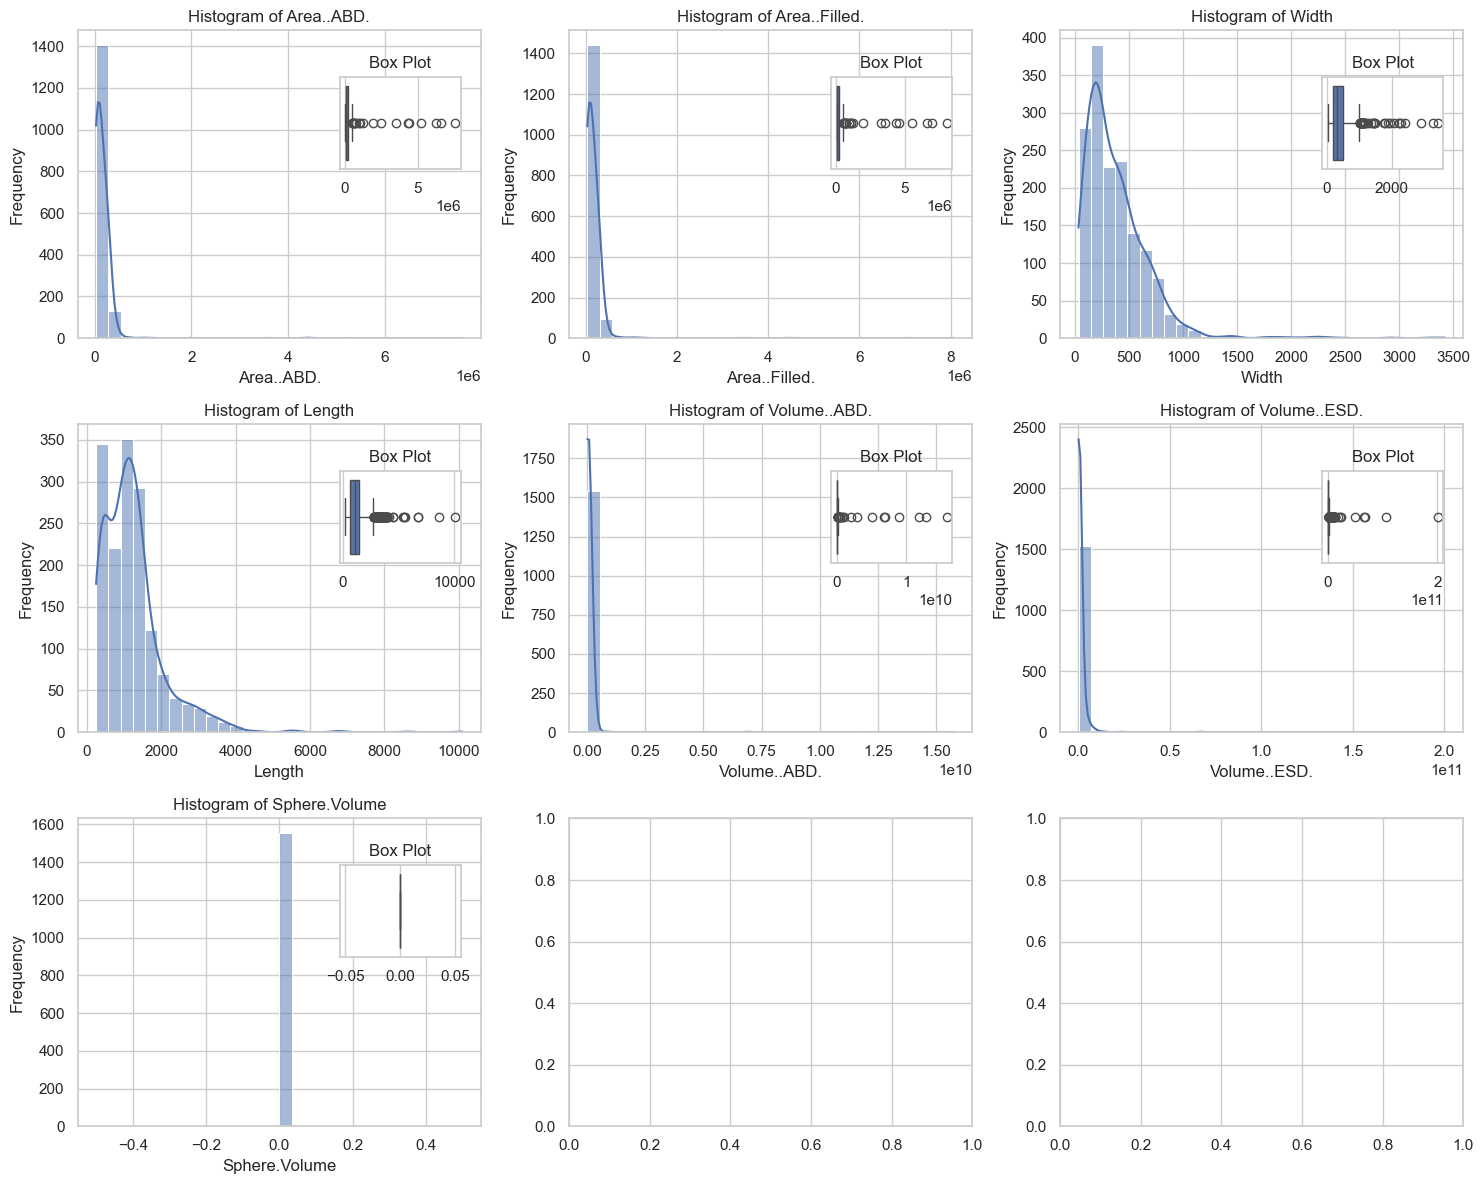

In [11]:
# Selecting numerical columns for analysis
shape_and_size_cols = [
    "Area..ABD.", "Area..Filled.", "Width", "Length", "Volume..ABD.", "Volume..ESD.", "Sphere.Volume"
]

structural_and_shape_cols = [
    "Symmetry", "Circularity", "Convexity"
]

optical_cols = [
    "Transparency", "Sum.Intensity"
]

# Finding most common (mode) and rare (1% percentile) values
common_values = merged_df[shape_and_size_cols].mode().iloc[0]  # Most common values
rare_values = merged_df[shape_and_size_cols].quantile(0.01)  # 1% percentile (rarest values)

# Display the results

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms and box plots for each numerical column
for i, col in enumerate(shape_and_size_cols):
    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
    # Box plot (inset)
    ax_inset = axes[i].inset_axes([0.65, 0.55, 0.3, 0.3])
    sns.boxplot(x=df[col], ax=ax_inset)
    ax_inset.set_title('Box Plot')
    ax_inset.set_xlabel('')
    ax_inset.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()